In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [83]:
data = pd.read_csv('taxi-price.csv')
data = data.rename(columns={'起步价':'init_price','里程价':'dist_price','夜间附加费':'ntextra_price','候时费':'wait_price','返空费':'eback_price'})
data = data.drop(['isd','orderid','VehicleNum'],axis=1)
data

,Stime,Lng,Lat,Etime,ELng,ELat,distance,interval,isnight,init_price,dist_price,eback_price,ntextra_price,wait_price,price
0,2020-01-20 00:01:04,114.111130,22.576750,2020-01-20 00:17:58,114.084915,22.540850,6785.602632,180.0,True,16,11.485446,-0.0,2.297089,2.400000,32.182536
1,2020-01-20 00:18:16,114.084915,22.540850,2020-01-20 00:44:47,114.056236,22.633383,15698.063306,309.0,True,16,32.875352,-0.0,6.575070,4.120000,59.570422
2,2020-01-20 00:44:52,114.056236,22.633383,2020-01-20 02:46:52,114.093498,22.554382,12508.941904,140.0,True,16,25.221461,-0.0,5.044292,1.866667,48.132419
3,2020-01-20 02:47:04,114.093536,22.554382,2020-01-20 04:13:57,114.052299,22.604366,15144.760499,100.0,True,16,31.547425,-0.0,6.309485,1.333333,55.190244
4,2020-01-20 04:23:07,114.052216,22.602118,2020-01-20 06:41:19,114.067886,22.521299,15458.541238,60.0,True,16,32.300499,-0.0,6.460100,0.800000,55.560599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,2020-01-20 22:48:01,114.114365,22.550632,2020-01-20 22:50:30,114.115753,22.557550,788.703128,77.0,False,11,-0.000000,-0.0,-0.000000,1.026667,12.026667
10615,2020-01-20 22:50:40,114.115501,22.557983,2020-01-20 23:03:03,114.118713,22.547882,6344.016208,90.0,False,11,10.425639,-0.0,0.000000,1.200000,22.625639
10616,2020-01-20 23:03:12,114.118484,22.547867,2020-01-20 23:20:04,114.133530,22.617550,9548.684789,228.0,True,16,18.116843,-0.0,3.623369,3.040000,40.780212
10617,2020-01-20 23:20:09,114.133286,22.617750,2020-01-20 23:42:55,114.089500,22.538067,11047.753534,108.0,True,16,21.714608,-0.0,4.342922,1.440000,43.497530


In [84]:
StimeMK = data['Stime'].apply(lambda x:time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S')))
metaMK = time.mktime(time.strptime('2020-01-20','%Y-%m-%d'))
data.insert(1,'StimeSec',(StimeMK-metaMK).apply(lambda x:int(x)))

In [85]:
data

,Stime,StimeSec,Lng,Lat,Etime,ELng,ELat,distance,interval,isnight,init_price,dist_price,eback_price,ntextra_price,wait_price,price
0,2020-01-20 00:01:04,64,114.111130,22.576750,2020-01-20 00:17:58,114.084915,22.540850,6785.602632,180.0,True,16,11.485446,-0.0,2.297089,2.400000,32.182536
1,2020-01-20 00:18:16,1096,114.084915,22.540850,2020-01-20 00:44:47,114.056236,22.633383,15698.063306,309.0,True,16,32.875352,-0.0,6.575070,4.120000,59.570422
2,2020-01-20 00:44:52,2692,114.056236,22.633383,2020-01-20 02:46:52,114.093498,22.554382,12508.941904,140.0,True,16,25.221461,-0.0,5.044292,1.866667,48.132419
3,2020-01-20 02:47:04,10024,114.093536,22.554382,2020-01-20 04:13:57,114.052299,22.604366,15144.760499,100.0,True,16,31.547425,-0.0,6.309485,1.333333,55.190244
4,2020-01-20 04:23:07,15787,114.052216,22.602118,2020-01-20 06:41:19,114.067886,22.521299,15458.541238,60.0,True,16,32.300499,-0.0,6.460100,0.800000,55.560599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,2020-01-20 22:48:01,82081,114.114365,22.550632,2020-01-20 22:50:30,114.115753,22.557550,788.703128,77.0,False,11,-0.000000,-0.0,-0.000000,1.026667,12.026667
10615,2020-01-20 22:50:40,82240,114.115501,22.557983,2020-01-20 23:03:03,114.118713,22.547882,6344.016208,90.0,False,11,10.425639,-0.0,0.000000,1.200000,22.625639
10616,2020-01-20 23:03:12,82992,114.118484,22.547867,2020-01-20 23:20:04,114.133530,22.617550,9548.684789,228.0,True,16,18.116843,-0.0,3.623369,3.040000,40.780212
10617,2020-01-20 23:20:09,84009,114.133286,22.617750,2020-01-20 23:42:55,114.089500,22.538067,11047.753534,108.0,True,16,21.714608,-0.0,4.342922,1.440000,43.497530


In [86]:
#计算订单用时
data['interval'] = (pd.to_datetime(data['Etime']) -pd.to_datetime(data['Stime'])).apply(lambda r:r.seconds)
#运营车速
data['speed'] = (data['distance']/data['interval'])*3.6
#运营车速太快太慢的筛掉
data = data[data['speed']<80].copy()
data = data[data['speed']>10].copy()


<Axes: >

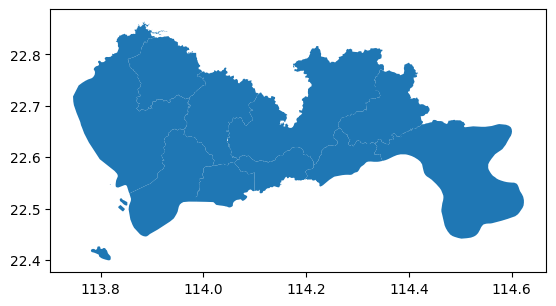

In [87]:
import geopandas
from shapely.geometry import Point,Polygon,shape

sz = geopandas.GeoDataFrame.from_file('sz.shp',encoding = 'utf-8')
sz.plot()

In [88]:
#栅格化
import math

testlon = 114
testlat = 22.5

lon1 = 113.75194
lon2 = 114.624187
lat1 = 22.447837
lat2 = 22.864748

latStart = min(lat1, lat2)
lonStart = min(lon1, lon2)

accuracy = 500

deltaLon = accuracy * 360 /(2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360))
deltaLat = accuracy * 360 /(2 * math.pi * 6371004)

LONCOL = divmod(float(testlon) - (lonStart - deltaLon / 2), deltaLon)[0]
LATCOL = divmod(float(testlat) - (latStart - deltaLat / 2), deltaLat)[0]

HBLON = LONCOL * deltaLon + (lonStart - deltaLon / 2)
HBLAT = LATCOL * deltaLat + (latStart - deltaLat /2)

LONCOL,LATCOL,HBLON,HBLAT,deltaLon,deltaLat

(51.0,
 12.0,
 113.99800701150498,
 22.499547959873865,
 0.004872614089207591,
 0.004496605206422906)

C:\Users\97121\AppData\Local\Temp\ipykernel_7528\2747938426.py:35: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  metagrid['geometry'] = geometry


<Axes: >

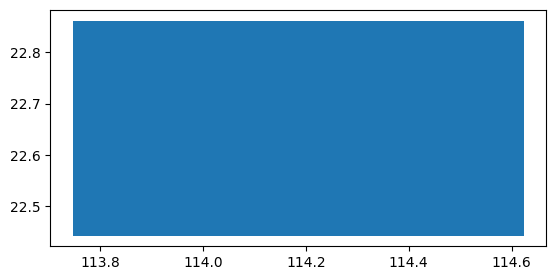

In [89]:
metagrid = geopandas. GeoDataFrame()

LONCOL1 = []
LATCOL1 = []
geometry = []
HBLON1 = []
HBLAT1 = []

lonsnum = int((lon2-lon1)/deltaLon)+1
latsnum = int((lat2-lat1)/deltaLat)+1

for i in range(lonsnum):
    for j in range(latsnum):

        HBLON = i*deltaLon + (lonStart - deltaLon / 2)
        HBLAT = j*deltaLat + (latStart - deltaLat / 2)
        LONCOL1.append(i)
        LATCOL1.append(j)
        HBLON1.append(HBLON)
        HBLAT1.append(HBLAT)

        HBLON_1 = (i+1)*deltaLon + (lonStart - deltaLon / 2)
        HBLAT_1 = (j+1)*deltaLat + (latStart - deltaLat / 2)
        geometry.append(Polygon([\
        (HBLON-deltaLon/2,HBLAT-deltaLat/2),\
        (HBLON_1-deltaLon/2,HBLAT-deltaLat/2),\
        (HBLON_1-deltaLon/2,HBLAT_1-deltaLat/2),\
        (HBLON-deltaLon/2,HBLAT_1-deltaLat/2)]))


metagrid['LONCOL'] = LONCOL1
metagrid['LATCOL'] = LATCOL1
metagrid['HBLON'] = HBLON1
metagrid['HBLAT'] = HBLAT1
metagrid['geometry'] = geometry

metagrid.plot()


<Axes: >

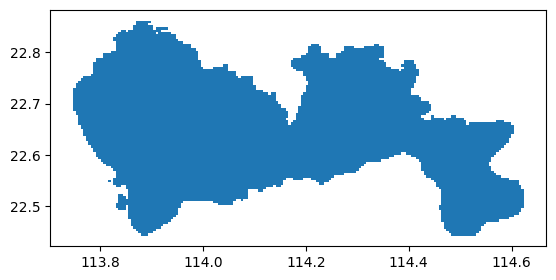

In [90]:
grid = metagrid[metagrid.intersects(sz.unary_union)]
grid.plot()

In [91]:
data['SLONCOL'] = ((data['Lng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')
data['SLATCOL'] = ((data['Lat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')


#data['SHBLON'] = data['SLONCOL'] * deltaLon + (lonStart - deltaLon / 2)
#data['SHBLAT'] = data['SLATCOL'] * deltaLat + (latStart - deltaLat / 2)

data['ELONCOL'] = ((data['ELng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')
data['ELATCOL'] = ((data['ELat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')

#data['EHBLON'] = data['ELONCOL'] * deltaLon + (lonStart - deltaLon / 2)
#data['EHBLAT'] = data['ELATCOL'] * deltaLat + (latStart - deltaLat / 2)

data

,Stime,StimeSec,Lng,Lat,Etime,ELng,ELat,distance,interval,isnight,...,dist_price,eback_price,ntextra_price,wait_price,price,speed,SLONCOL,SLATCOL,ELONCOL,ELATCOL
0,2020-01-20 00:01:04,64,114.111130,22.576750,2020-01-20 00:17:58,114.084915,22.540850,6785.602632,1014,True,...,11.485446,-0.0,2.297089,2.400000,32.182536,24.090897,74,29,68,21
1,2020-01-20 00:18:16,1096,114.084915,22.540850,2020-01-20 00:44:47,114.056236,22.633383,15698.063306,1591,True,...,32.875352,-0.0,6.575070,4.120000,59.570422,35.520445,68,21,62,41
3,2020-01-20 02:47:04,10024,114.093536,22.554382,2020-01-20 04:13:57,114.052299,22.604366,15144.760499,5213,True,...,31.547425,-0.0,6.309485,1.333333,55.190244,10.458687,70,24,62,35
5,2020-01-20 06:41:20,24080,114.067886,22.521299,2020-01-20 06:55:02,114.062798,22.517616,3797.074876,822,False,...,4.312980,-0.0,0.000000,1.066667,16.379646,16.629525,65,16,64,16
6,2020-01-20 06:55:12,24912,114.062798,22.517616,2020-01-20 07:10:28,114.080414,22.558634,7497.547127,916,False,...,13.194113,-0.0,0.000000,0.533333,24.727446,29.466342,64,16,67,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,2020-01-20 22:48:01,82081,114.114365,22.550632,2020-01-20 22:50:30,114.115753,22.557550,788.703128,149,False,...,-0.000000,-0.0,-0.000000,1.026667,12.026667,19.055915,74,23,75,24
10615,2020-01-20 22:50:40,82240,114.115501,22.557983,2020-01-20 23:03:03,114.118713,22.547882,6344.016208,743,False,...,10.425639,-0.0,0.000000,1.200000,22.625639,30.738167,75,24,75,22
10616,2020-01-20 23:03:12,82992,114.118484,22.547867,2020-01-20 23:20:04,114.133530,22.617550,9548.684789,1012,True,...,18.116843,-0.0,3.623369,3.040000,40.780212,33.967653,75,22,78,38
10617,2020-01-20 23:20:09,84009,114.133286,22.617750,2020-01-20 23:42:55,114.089500,22.538067,11047.753534,1366,True,...,21.714608,-0.0,4.342922,1.440000,43.497530,29.115602,78,38,69,20


In [92]:
#去除超格的
data = data[(data['SLONCOL']>=0) & (data['SLATCOL']>=0) &(data['ELONCOL']>=0) & (data['ELATCOL']>=0)&(data['SLONCOL']<=lonsnum) & (data['SLATCOL']<=latsnum) &(data['ELONCOL']<=lonsnum) & (data['ELATCOL']<=latsnum)]
#1min以上2h以内距离大于500m订单
data = data[(data['interval']<=7200) & (data['interval']>60) & (data['distance']>=500)]

In [93]:
data['dtLON'] = np.abs(data['ELONCOL']-data['SLONCOL'])
data['dtLAT'] = np.abs(data['ELATCOL']-data['SLATCOL'])
data['dtdis'] = np.sqrt(np.square(data['dtLON'])+np.square(data['dtLAT']))
data['isrushhour'] = data['StimeSec'].apply(lambda x:1 if 25200<=x<32400 or 64800<=x<72000 else 0)
data['isnight'] = data['isnight'].apply(lambda x:1 if x==True else 0)

In [94]:
table = data[['StimeSec','isrushhour','isnight','SLONCOL','SLATCOL','ELONCOL','ELATCOL','dtdis','distance','interval']]


In [100]:
table

,StimeSec,isrushhour,isnight,SLONCOL,SLATCOL,ELONCOL,ELATCOL,dtdis,distance,interval
0,64,0,1,74,29,68,21,10.000000,6785.602632,1014
1,1096,0,1,68,21,62,41,20.880613,15698.063306,1591
3,10024,0,1,70,24,62,35,13.601471,15144.760499,5213
5,24080,0,0,65,16,64,16,1.000000,3797.074876,822
6,24912,0,0,64,16,67,25,9.486833,7497.547127,916
...,...,...,...,...,...,...,...,...,...,...
10614,82081,0,0,74,23,75,24,1.414214,788.703128,149
10615,82240,0,0,75,24,75,22,2.000000,6344.016208,743
10616,82992,0,1,75,22,78,38,16.278821,9548.684789,1012
10617,84009,0,1,78,38,69,20,20.124612,11047.753534,1366


In [96]:

table.to_csv('4train.csv',index=None)